

#Zomato Data Analysis Using Python

#Import necessary python libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#####pandas is used for data manipulation and analysis.
#####numpy is used for numrical operation.
#####matplotlib.pyplot and seaborn are used for data visualization.

#Import a dataset and create a dataframe .

In [ ]:
df = pd.read_csv('/content/Zomato data .csv')

# Display the first few rows of the DataFrame
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#Lets convert the data type of the "rate" column to float and remove the denominator.

In [ ]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

df["rate"]=df["rate"].apply(handleRate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#Summary of data frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#Conclusion - there no NULL value in dataframe

In [ ]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


#Type of restaurant

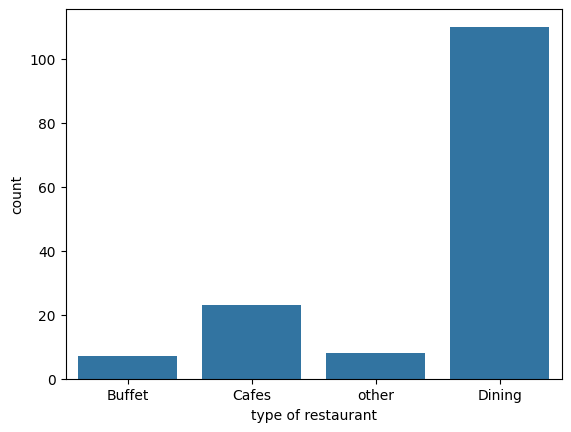

In [ ]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of restaurant")
plt.show()

#Conclusion: The majority of the restaurant fall into the dinning category.

#Dinning restaurant are preferred by larger number of individuals.

Text(0, 0.5, 'votes')

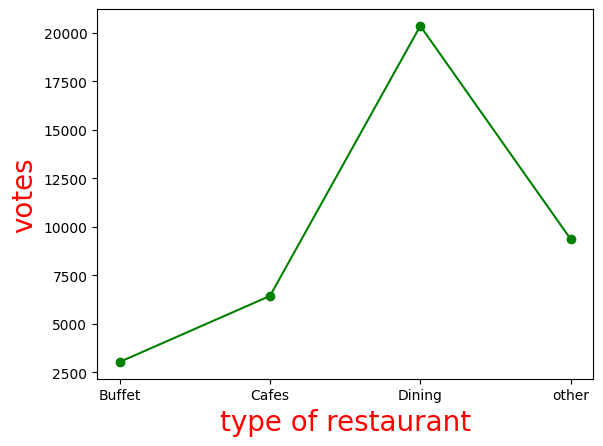

In [ ]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("type of restaurant", c="red", size=20)
plt.ylabel("votes", c="red", size=20)

#The majority of restaurant received ratings.


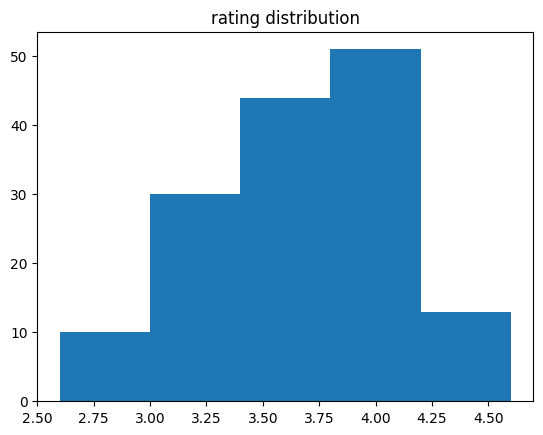

In [ ]:
plt.hist(df['rate'],bins=5)
plt.title("rating distribution")
plt.show()

#Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

#The majority of couples prefer restaurants with an approximate cost of 300 rupees.

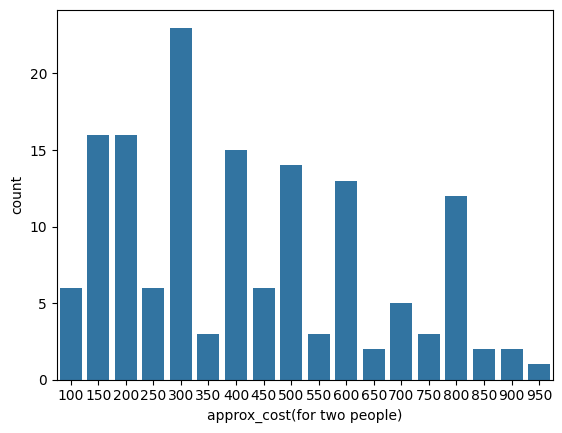

In [ ]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.show()

#Whether online orders receive higher rating than offline orders.

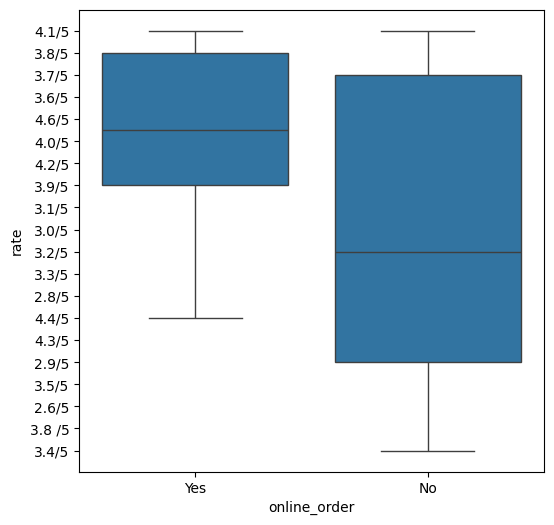

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.show()

#Conclusion: Offline order received lower rating in comparision to online orders, which obtained excellent rating.

# Plot a heatmap


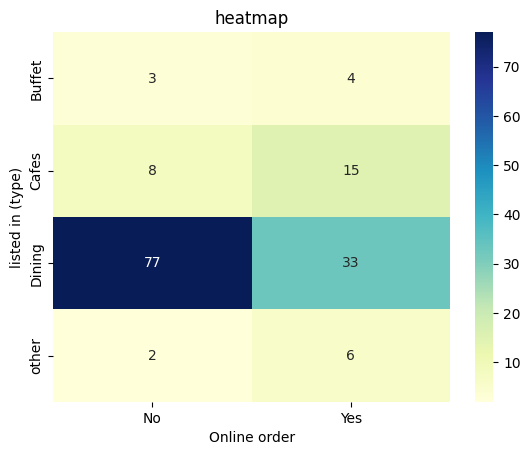

In [ ]:
pd.pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=(0))
sns.heatmap(pd.pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("heatmap")
plt.xlabel("Online order")
plt.ylabel("listed in (type)")
plt.show()


#Conclusion: dining restaurant primarily accept offline orders, whereas cafes primarily received online orders. This suggests that client prefer to place orders in person at restaurant, but prefer online ordering at cafes.

# The majority of couples prefer restaurants with an approximate cost of 300 rupees.



/tmp/ipython-input-10-1115780625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data, palette='viridis')


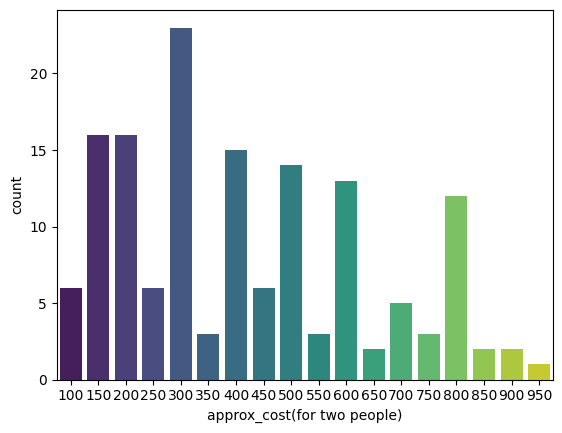

In [ ]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data, palette='viridis')
plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    df = pd.read_csv('Zomato data .csv')

# Display the first few rows of the DataFrame
print(df.head())    def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

df["rate"]=df["rate"].apply(handleRate)
print(df.head())   sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of rastaurant")   grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")    
plt.xlabel("type of restaurant", c="red", size=20)
plt.ylabel("votes", c="red", size=20)plt.show()   plt.hist(df['rate'],bins=5)
plt.title("rating distribution")
plt.show()   couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)  plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.show()plt.show()  pd.pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=(0))
sns.heatmap(pd.pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("heatmap")
plt.xlabel("Olineo rder")
plt.ylabel("listed in (type)")
plt.show()   according to this i want chapter 6 Findings, Result, Suggestions and recommendation 7 to 8 sub points

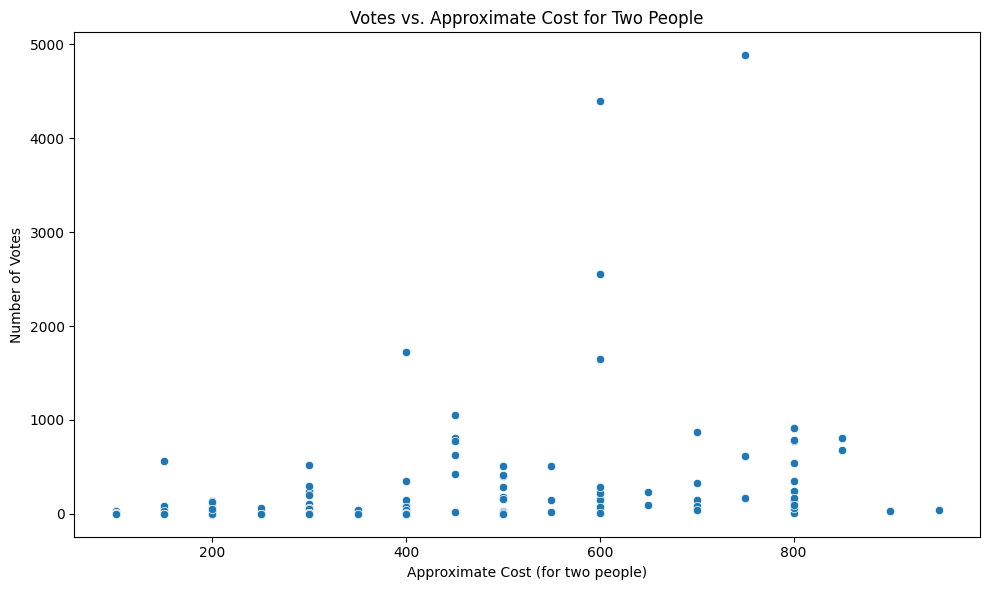

In [ ]:
# Visualize the relationship between votes and approximate cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='votes', data=df)
plt.title('Votes vs. Approximate Cost for Two People')
plt.xlabel('Approximate Cost (for two people)')
plt.ylabel('Number of Votes')
plt.tight_layout()
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='votes'>

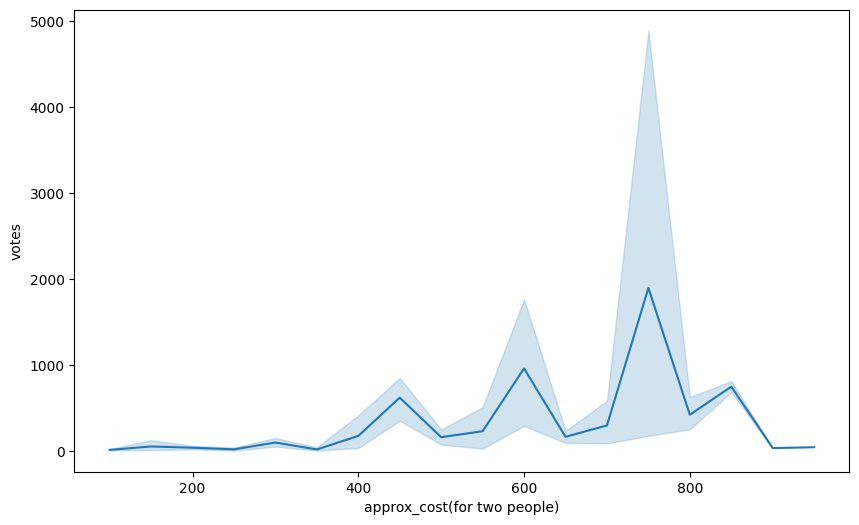

In [ ]:
# area chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='approx_cost(for two people)', y='votes', data=df)

## Relationship between Table Booking and Restaurant Type

In [ ]:
# Analyze the relationship between table booking and listed_in(type)
book_table_by_type = df.groupby('listed_in(type)')['book_table'].value_counts().unstack().fillna(0)
print(book_table_by_type)

book_table        No  Yes
listed_in(type)          
Buffet             6    1
Cafes             20    3
Dining           108    2
other              6    2


#This code groups the data by 'listed_in(type)' and counts the occurrences of 'Yes' and 'No' in the 'book_table' column. The result is a table showing the number of restaurants in each type that offer table booking.

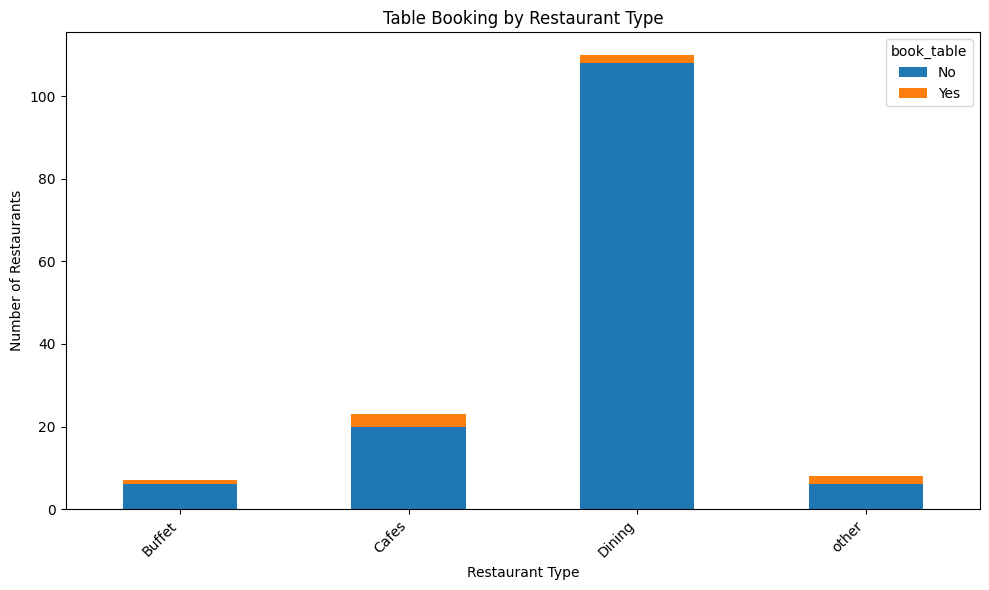

In [ ]:
# Visualize the relationship between table booking and listed_in(type)
book_table_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Table Booking by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#relationship between online onder and restaurant type

In [ ]:
# Analyze the relationship between online orders and listed_in(type)
online_orders_by_type = df.groupby('listed_in(type)')['online_order'].value_counts().unstack().fillna(0)
print(online_orders_by_type)


online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


#The majority of restaurants are "Dining" type and they receive the most votes, while online orders tend to have higher ratings than offline orders.

<Axes: xlabel='listed_in(type)'>

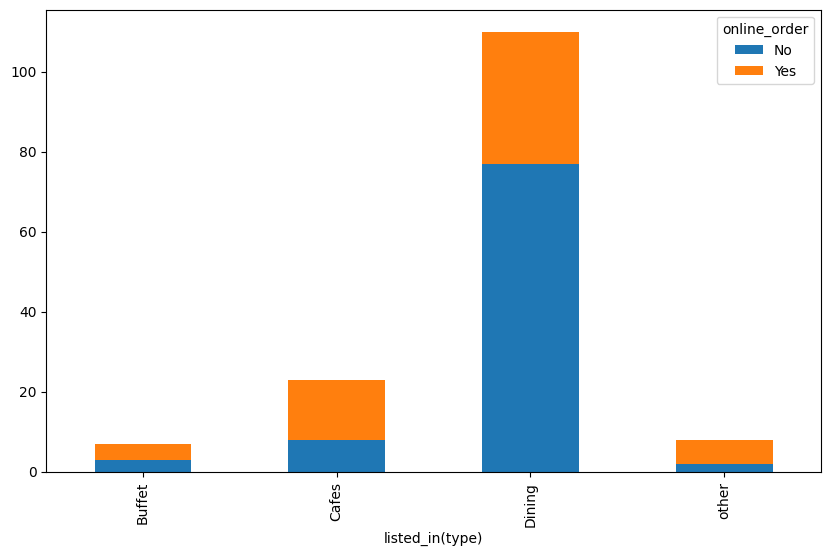

In [ ]:
# Visualize the relationship between online orders booking and listed_in(type)
online_orders_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Online Orders by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


create ppt Slide 1: Title Slide Project Title Slide 2: Problem DefinitionSlide 3: Hypothesis Slide 4: Project Objectives Slide 5: Data Collection Slide 6: Data Cleaning Slide 7: Data Analysis Slide 8: interpretation of the data analysis 9: achievement of your project 10: suggestions and future enhancement according to thid point create 10 slide ppt with visuals properly